In [1]:
# import modules

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

%qtconsole

In [2]:
data_raw_dir = 'C:\\Users\\Bryan\\OneDrive\\02 GitHub\\water-pump-tanzania\\data\\raw\\'
data_interim_dir = 'C:\\Users\\Bryan\\OneDrive\\02 GitHub\\water-pump-tanzania\\data\\interim\\'
data_processed_dir = 'C:\\Users\\Bryan\\OneDrive\\02 GitHub\\water-pump-tanzania\\data\\processed\\'
docs_img_dir = 'C:\\Users\\bryan\\OneDrive\\02 GitHub\\water-pump-tanzania\\docs\\img\\'

In [3]:
df_train_val = pd.read_csv(data_interim_dir + 'training_data_clean_impv1.csv')

status_group = df_train_val['status_group']

df_test_val = pd.read_csv(data_interim_dir+'test_data_clean_impv1.csv')

df_comp_val = pd.concat([df_train_val,df_test_val]).reset_index(drop=True)

In [4]:
df_comp_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74228 entries, 0 to 74227
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     74228 non-null  int64  
 1   amount_tsh             74228 non-null  float64
 2   gps_height             74228 non-null  int64  
 3   longitude              74228 non-null  float64
 4   latitude               74228 non-null  float64
 5   basin                  74228 non-null  object 
 6   region                 74228 non-null  object 
 7   district_code          74228 non-null  int64  
 8   lga                    74228 non-null  object 
 9   population             74228 non-null  int64  
 10  public_meeting         74228 non-null  int64  
 11  permit                 74228 non-null  int64  
 12  extraction_type_class  74228 non-null  object 
 13  management             74228 non-null  object 
 14  payment                74228 non-null  object 
 15  wa

Need to encode all object and categorical values.

### gps_height

In [5]:
var = 'gps_height'
var_red = var+'_reduced'

df_comp_val[var].value_counts()

 0       25627
-16         71
-15         69
-13         68
-19         65
         ...  
 2353        1
 2417        1
 2545        1
 2416        1
 2285        1
Name: gps_height, Length: 2456, dtype: int64

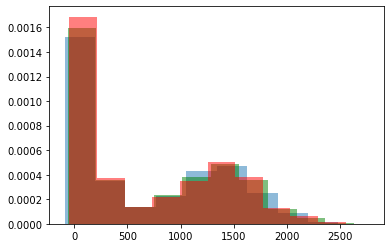

In [6]:
plt.figure()

plt.hist(df_comp_val[df_comp_val['status_group']=='non functional'][var],alpha=0.5,density=True);
plt.hist(df_comp_val[df_comp_val['status_group']=='functional'][var],color='green',alpha=0.5,density=True);
plt.hist(df_comp_val[df_comp_val['status_group']=='functional needs repair'][var],color='red',alpha=0.5,density=True);

In [7]:
# no difference in distribution between target variables

df_comp_val = df_comp_val.drop(labels=[var],axis=1)

### basin

In [8]:
var = 'basin'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[-3:]
num_unique = len(df_comp_val[var].unique())

df_comp_val[var].value_counts()

Lake Victoria              12849
Pangani                    11143
Rufiji                      9987
Internal                    9642
Lake Tanganyika             8052
Wami / Ruvu                 7577
Lake Nyasa                  6332
Ruvuma / Southern Coast     5587
Lake Rukwa                  3059
Name: basin, dtype: int64

In [9]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

other              14978
Lake Victoria      12849
Pangani            11143
Rufiji              9987
Internal            9642
Lake Tanganyika     8052
Wami / Ruvu         7577
Name: basin_reduced, dtype: int64

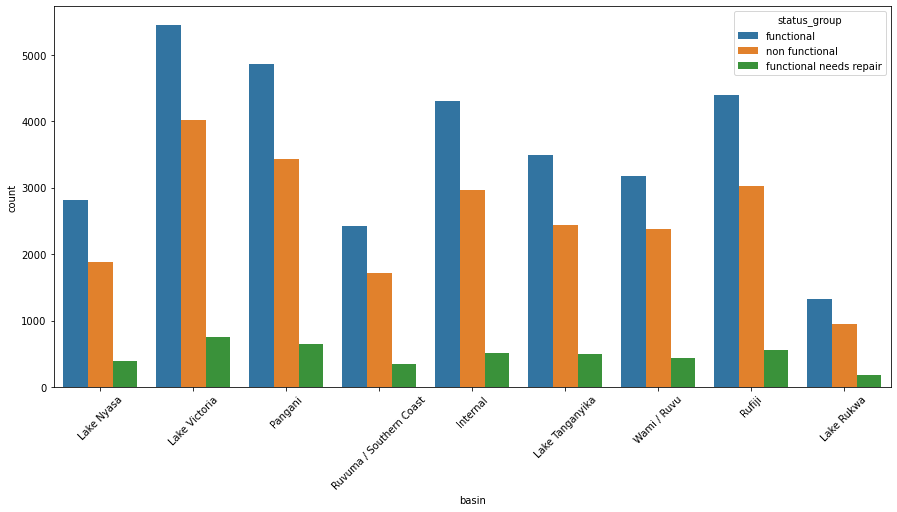

In [10]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var,hue='status_group')
plt.xticks(rotation=45);

In [11]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var],prefix=var)],axis=1)

In [12]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

### region

In [13]:
var = 'region'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[6:]
num_unique = len(df_comp_val[var].unique())

df_comp_val[var].value_counts()

Kilimanjaro      5503
Morogoro         5073
Njombe           4574
Arusha           4096
Mbeya            4056
Kagera           3884
Kigoma           3533
Simiyu           3405
Pwani            3329
Ruvuma           3306
Tanga            3150
Mwanza           2958
Dodoma           2780
Singida          2534
Shinyanga        2525
Tabora           2489
Mara             2450
Mtwara           2144
Iringa           2006
Manyara          1980
Lindi            1920
Songwe           1718
Geita            1548
Rukwa            1390
Dar es Salaam    1025
Katavi            852
Name: region, dtype: int64

In [14]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

other          47042
Kilimanjaro     5503
Morogoro        5073
Njombe          4574
Arusha          4096
Mbeya           4056
Kagera          3884
Name: region_reduced, dtype: int64

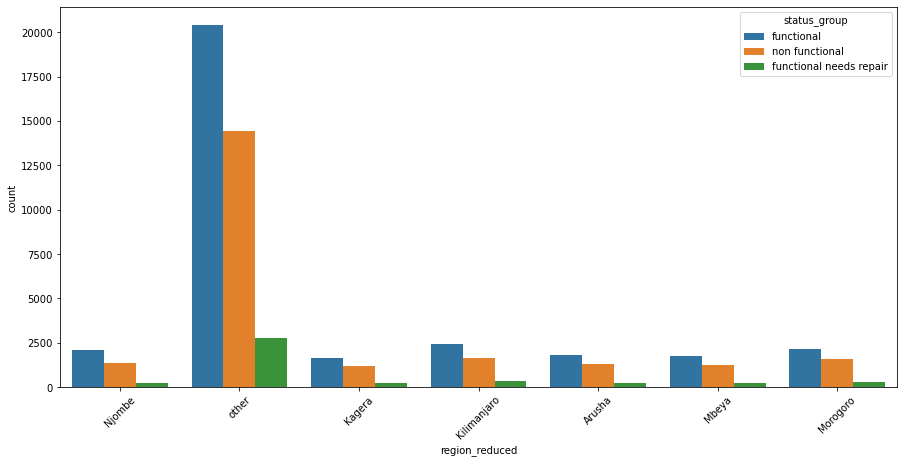

In [15]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [16]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var_red],prefix=var)],axis=1)

In [17]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

## district_code

In [18]:
var = 'district_code'
df_comp_val[var].value_counts()

1     15299
2     13907
3     12521
4     11253
5      5428
6      5108
7      4166
8      1282
30     1256
33     1063
53      921
43      653
13      496
23      360
63      264
62      127
60       76
0        27
80       13
67        8
Name: district_code, dtype: int64

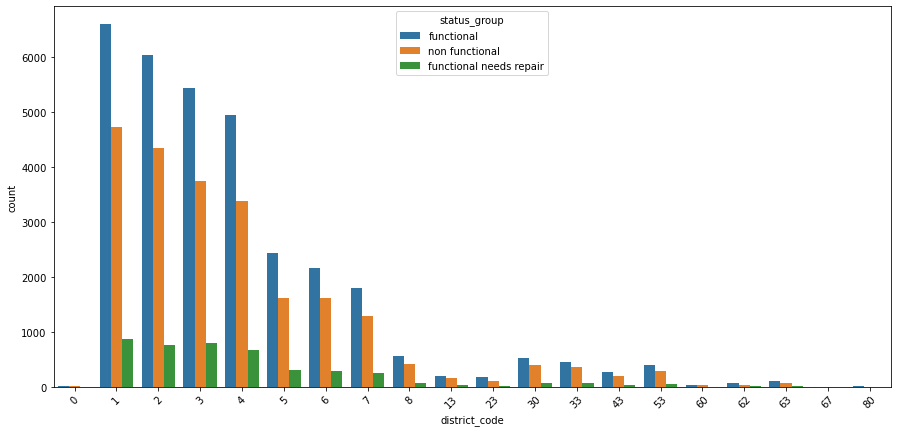

In [19]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var,hue='status_group')
plt.xticks(rotation=45);

### lga

In [20]:
var = 'lga'
df_comp_val[var].value_counts()

Wanging'ombe                  1676
Moshi                         1547
Arusha                        1458
Rungwe                        1386
Bagamoyo                      1242
                              ... 
Mafinga Township Authority      32
Masasi  Township Authority      13
Mbeya Urban                      3
Babati Urban                     3
Tunduma                          2
Name: lga, Length: 158, dtype: int64

Too many unique values - diluting feature importance

In [21]:
df_comp_val = df_comp_val.drop(labels=[var],axis=1)

## population

<AxesSubplot:>

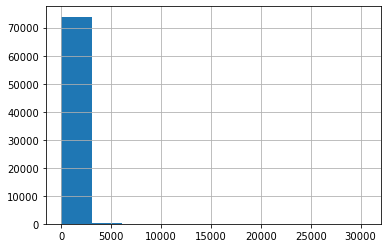

In [22]:
var = 'population'

df_comp_val[var].hist()

In [23]:
df_comp_val[var+'_bin'] = pd.qcut(df_comp_val[var],5,duplicates='drop',labels=['0-40','40-60','60-80','80-100']).astype(str)

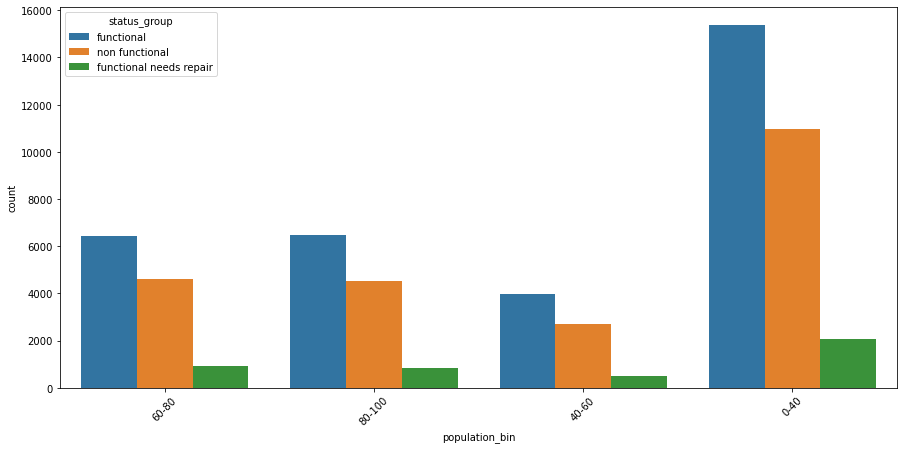

In [24]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var+'_bin',hue='status_group')
plt.xticks(rotation=45);

In [25]:
#df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var+'_bin'],prefix=var)],axis=1)

In [26]:
df_comp_val = df_comp_val.drop(labels=[var+'_bin'],axis=1)

### management

In [27]:
var = 'management'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[6:]
num_unique = len(df_comp_val[var].unique())

df_comp_val[var].value_counts()

vwc                 50602
wug                  8108
water board          3688
wua                  3118
private operator     2504
parastatal           2229
water authority      1123
other                1083
company               859
unknown               683
other - school        126
trust                 105
Name: management, dtype: int64

In [28]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

vwc                 50602
wug                  8108
other                3979
water board          3688
wua                  3118
private operator     2504
parastatal           2229
Name: management_reduced, dtype: int64

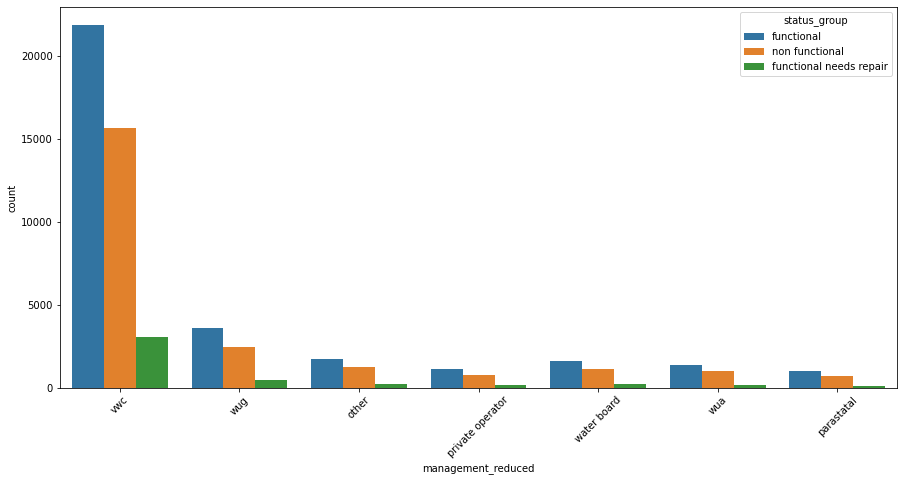

In [29]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [30]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var],prefix=var)],axis=1)

In [31]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

### extraction_type_class

In [32]:
var = 'extraction_type_class'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[4:]
num_unique = len(df_comp_val[var].unique())

df_comp_val[var].value_counts()

gravity         33262
handpump        20603
other            8097
submersible      7772
motorpump        3770
rope pump         572
wind-powered      152
Name: extraction_type_class, dtype: int64

In [33]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

gravity        33262
handpump       20603
other          12591
submersible     7772
Name: extraction_type_class_reduced, dtype: int64

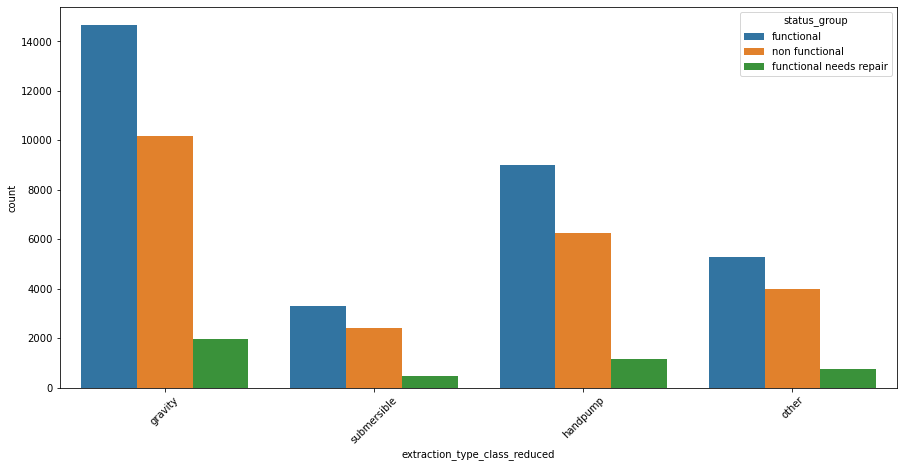

In [34]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [35]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var_red],prefix=var)],axis=1)

In [36]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

### payment

In [37]:
var = 'payment'
vvar_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[6:]
num_unique = len(df_comp_val[var].unique())

df_comp_val[var].value_counts()

never pay                31696
pay per bucket           11261
pay monthly              10396
unknown                  10149
pay when scheme fails     4842
pay annually              4570
other                     1314
Name: payment, dtype: int64

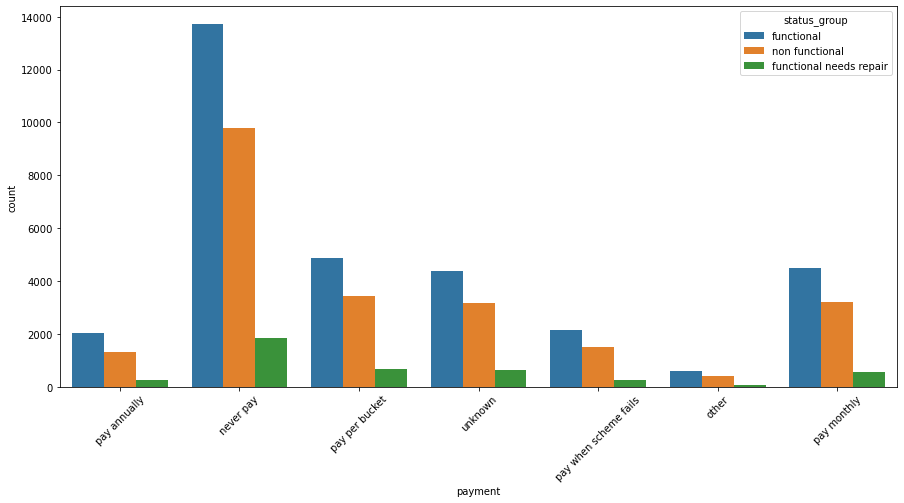

In [38]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var,hue='status_group')
plt.xticks(rotation=45);

In [39]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var],prefix=var)],axis=1)

In [40]:
df_comp_val = df_comp_val.drop(labels=[var],axis=1)

### water_quality

In [41]:
var = 'water_quality'
var_red = var+'_reduced'

per = 0.01

limited_list = df_comp_val[var].value_counts()[df_comp_val[var].value_counts(normalize=True)<=per]
num_unique = len(df_comp_val[var].unique())

print(str(num_unique)+' total labels, and '+str(len(limited_list.index))+' labels under '+str(per*100)+'%')

df_comp_val[var][df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

8 total labels, and 4 labels under 1.0%


coloured              623
salty abandoned       423
fluoride              244
fluoride abandoned     23
Name: water_quality, dtype: int64

In [42]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

soft       63484
salty       6081
unknown     2345
other       1313
milky       1005
Name: water_quality_reduced, dtype: int64

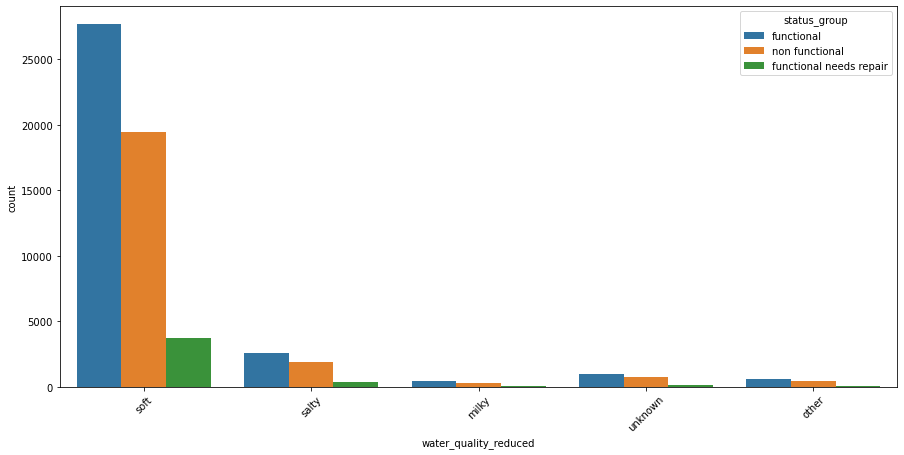

In [43]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [44]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var_red],prefix=var)],axis=1)

In [45]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

### quantity

In [46]:
var = 'quantity'
var_red = var+'_reduced'

per = 0.01

limited_list = df_comp_val[var].value_counts()[df_comp_val[var].value_counts(normalize=True)<=per]
num_unique = len(df_comp_val[var].unique())

print(str(num_unique)+' total labels, and '+str(len(limited_list.index))+' labels under '+str(per*100)+'%')

df_comp_val[var].value_counts()

5 total labels, and 0 labels under 1.0%


enough          41502
insufficient    18894
dry              7782
seasonal         5075
unknown           975
Name: quantity, dtype: int64

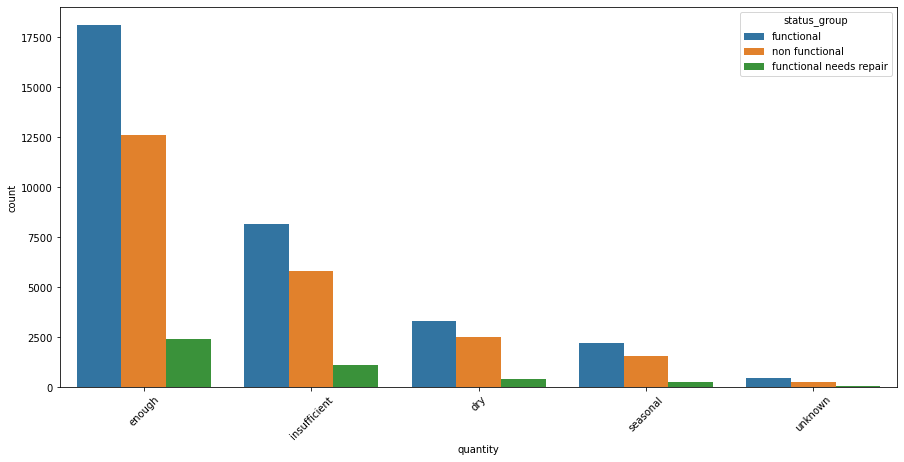

In [47]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var,hue='status_group')
plt.xticks(rotation=45);

In [48]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var],prefix=var)],axis=1)

In [49]:
df_comp_val = df_comp_val.drop(labels=[var],axis=1)

### source

In [50]:
var = 'source'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[4:]
num_unique = len(df_comp_val[var].unique())

df_comp_val[var].value_counts()

spring                  21216
shallow well            21127
machine dbh             13814
river                   11964
rainwater harvesting     2862
hand dtw                 1108
lake                      950
dam                       840
other                     261
unknown                    86
Name: source, dtype: int64

In [51]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

spring          21216
shallow well    21127
machine dbh     13814
river           11964
other            6107
Name: source_reduced, dtype: int64

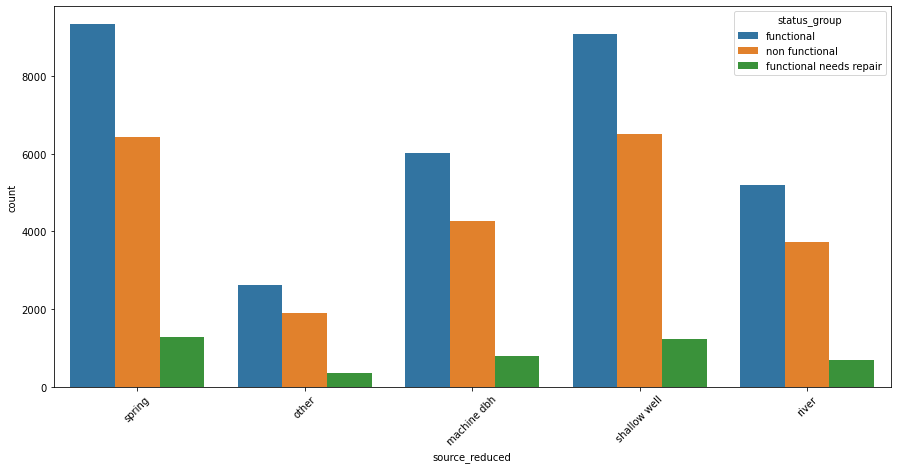

In [52]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [53]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var],prefix=var)],axis=1)

In [54]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

### source_class

In [55]:
var = 'source_class'
var_red = var+'_reduced'

per = 0.01

limited_list = df_comp_val[var].value_counts()[df_comp_val[var].value_counts(normalize=True)<=per]
num_unique = len(df_comp_val[var].unique())

print(str(num_unique)+' total labels, and '+str(len(limited_list.index))+' labels under '+str(per*100)+'%')

df_comp_val[var][df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

3 total labels, and 1 labels under 1.0%


unknown    347
Name: source_class, dtype: int64

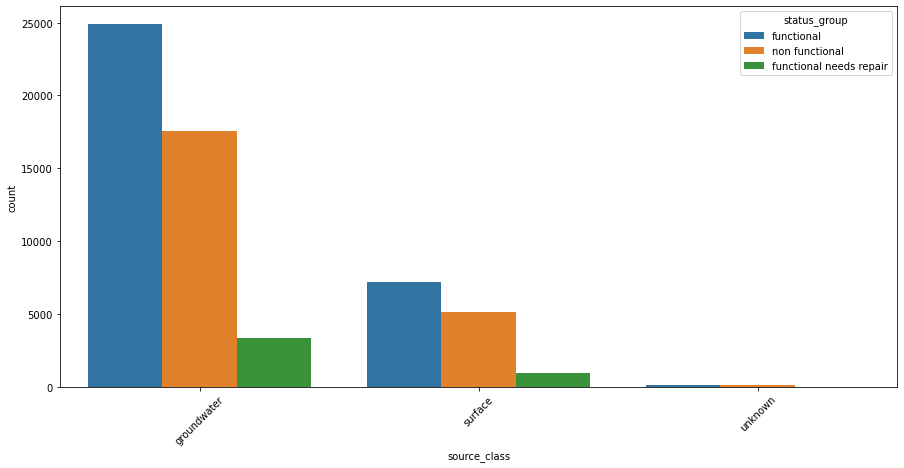

In [56]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var,hue='status_group')
plt.xticks(rotation=45);

In [57]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var],prefix=var)],axis=1)

In [58]:
df_comp_val = df_comp_val.drop(labels=[var],axis=1)

### waterpoint_type

In [59]:
var = 'waterpoint_type'
var_red = var+'_reduced'

per = 0.05

limited_list = df_comp_val[var].value_counts()[df_comp_val[var].value_counts(normalize=True)<=per]
num_unique = len(df_comp_val[var].unique())

print(str(num_unique)+' total labels, and '+str(len(limited_list.index))+' labels under '+str(per*100)+'%')

df_comp_val[var][df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

7 total labels, and 3 labels under 5.0%


improved spring    959
cattle trough      150
dam                  8
Name: waterpoint_type, dtype: int64

In [60]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

communal standpipe             35624
hand pump                      21875
other                           9121
communal standpipe multiple     7608
Name: waterpoint_type_reduced, dtype: int64

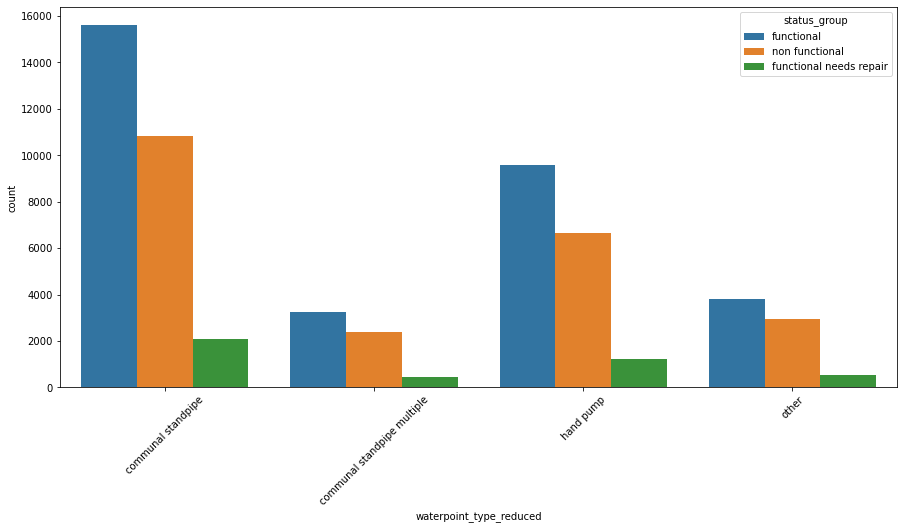

In [61]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [62]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var_red],prefix=var)],axis=1)

In [63]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

### pump_age

In [64]:
var = 'pump_age'
var_red = var+'_reduced'

per = 0.01

limited_list = df_comp_val[var].value_counts()[df_comp_val[var].value_counts(normalize=True)<=per]
num_unique = len(df_comp_val[var].unique())

print(str(num_unique)+' total labels, and '+str(len(limited_list.index))+' labels under '+str(per*100)+'%')

df_comp_val[var].value_counts()

61 total labels, and 27 labels under 1.0%


 3    5208
 2    4437
 1    4281
 4    3613
 5    3612
      ... 
-5       6
-4       4
-7       2
-3       2
-6       1
Name: pump_age, Length: 61, dtype: int64

In [65]:
for idx in df_comp_val[df_comp_val[var]<0].index.tolist():
    df_comp_val.loc[idx,var] = 0

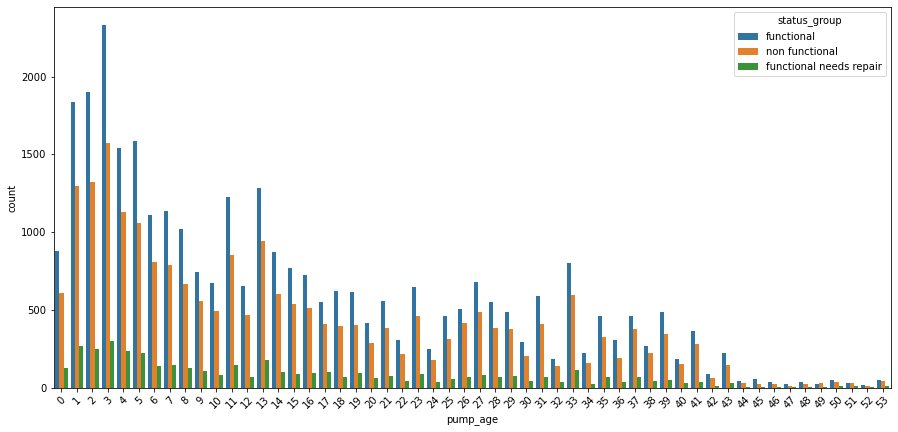

In [66]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var,hue='status_group')
plt.xticks(rotation=45);

## Feature Review

In [67]:
df_comp_val.iloc[:3,:]

,id,amount_tsh,longitude,latitude,district_code,population,public_meeting,permit,pump_age,status_group,...,source_shallow well,source_spring,source_unknown,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_hand pump,waterpoint_type_other
0,69572,6000.0,34.938093,-9.856322,5,109,1,0,12,functional,...,0,1,0,1,0,0,1,0,0,0
1,8776,0.0,34.698766,-2.147466,2,280,0,1,3,functional,...,0,0,0,0,1,0,1,0,0,0
2,34310,25.0,37.460664,-3.821329,4,250,1,1,4,functional,...,0,0,0,0,1,0,0,1,0,0


In [68]:
df_comp_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74228 entries, 0 to 74227
Data columns (total 76 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   id                                           74228 non-null  int64  
 1   amount_tsh                                   74228 non-null  float64
 2   longitude                                    74228 non-null  float64
 3   latitude                                     74228 non-null  float64
 4   district_code                                74228 non-null  int64  
 5   population                                   74228 non-null  int64  
 6   public_meeting                               74228 non-null  int64  
 7   permit                                       74228 non-null  int64  
 8   pump_age                                     74228 non-null  int64  
 9   status_group                                 59384 non-null  object 
 10

In [69]:
train_index = df_train_val.id.tolist()
test_index = df_test_val.id.tolist()

df_train_val_new = df_comp_val[df_comp_val.id.isin(train_index)]


df_train_val_new.to_csv(data_processed_dir+'training_data_encoded_impv1.csv',index=False)

df_test_val_new = df_comp_val[df_comp_val.id.isin(test_index)]
df_test_val_new.to_csv(data_processed_dir+'test_data_encoded_impv1.csv',index=False)